In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


<font size="+3" color=purple ><b> <center><u>Health care: Heart attack possibility</u></center></b></font>

<font size="+2" color=blue ><b> <center><u>Predicting the heart attack using dataset</u></center></b></font>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
1) age :Person's age

2) sex : Gender of person

3) chest pain type (4 values)
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

4) trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5) chol: serum cholestoral in mg/dl

6) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7) restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8) thalach: maximum heart rate achieved

9) exang: exercise induced angina (1 = yes; 0 = no)

10) oldpeak = ST depression induced by exercise relative to rest

11) slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping

12) ca: number of major vessels (0-3) colored by flourosopy

13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14) target: 0= less chance of heart attack 1= more chance of heart attack

## Table of Contents
1) Import Require Packages

2) Explanatory Data Anaysis(EDA)

3) Preparing Dataset For Model Building

4) Models evaluation

5) Conclusion

# Import Require Packages

In [3]:
#loading Data
import pandas as pd 
import numpy as np 
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
#EDA
import pandas_profiling as pp
#Data Preprocessing
from sklearn import preprocessing
#Data Splitting
from sklearn.model_selection import train_test_split
#Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#model evaluation 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve

In [2]:
#Load Data
df=pd.read_csv("/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv")

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Explanatory Data Anaysis(EDA)

In [51]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df1=df.drop_duplicates(subset=None,keep=False,inplace=False)

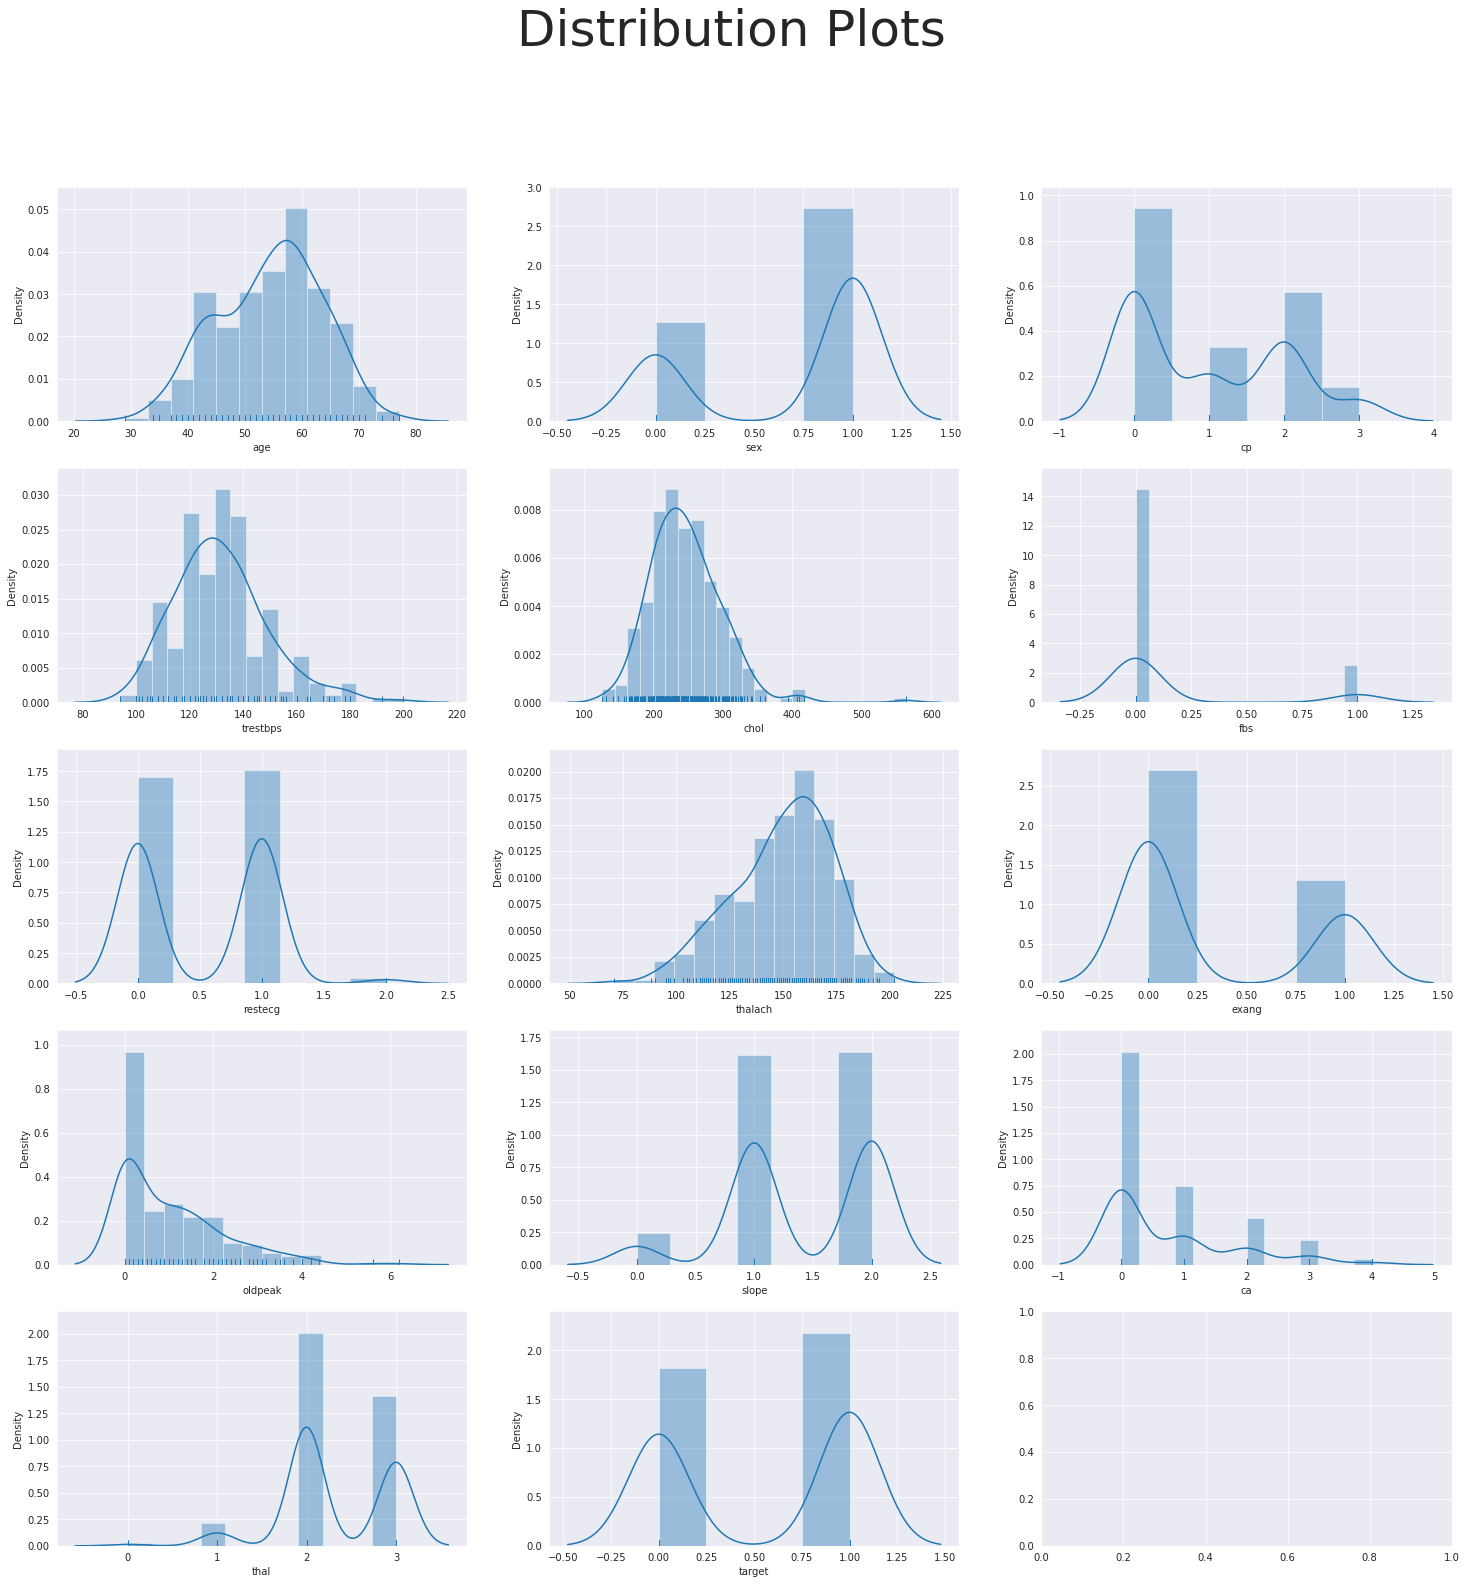

In [22]:
# Distribution plot of Variables
fig,axis=plt.subplots(5,3,figsize=(25,25))
sns.set_style('darkgrid')
sns.distplot(df["age"],rug=True,vertical=False,ax=axis[0,0])
sns.distplot(df["sex"],rug=True,vertical=False,ax=axis[0,1])
sns.distplot(df["cp"],rug=True,vertical=False,ax=axis[0,2])
sns.distplot(df["trestbps"],rug=True,vertical=False,ax=axis[1,0])
sns.distplot(df["chol"],rug=True,vertical=False,ax=axis[1,1])
sns.distplot(df["fbs"],rug=True,vertical=False,ax=axis[1,2])
sns.distplot(df["restecg"],rug=True,vertical=False,ax=axis[2,0])
sns.distplot(df["thalach"],rug=True,vertical=False,ax=axis[2,1])
sns.distplot(df["exang"],rug=True,vertical=False,ax=axis[2,2])
sns.distplot(df["oldpeak"],rug=True,vertical=False,ax=axis[3,0])
sns.distplot(df["slope"],rug=True,vertical=False,ax=axis[3,1])
sns.distplot(df["ca"],rug=True,vertical=False,ax=axis[3,2])
sns.distplot(df["thal"],rug=True,vertical=False,ax=axis[4,0])
sns.distplot(df["target"],rug=True,vertical=False,ax=axis[4,1])
plt.suptitle("Distribution Plots",size=50)

plt.show()

Text(0.5, 0.98, 'Boxen Plot of Oldpeak variable')

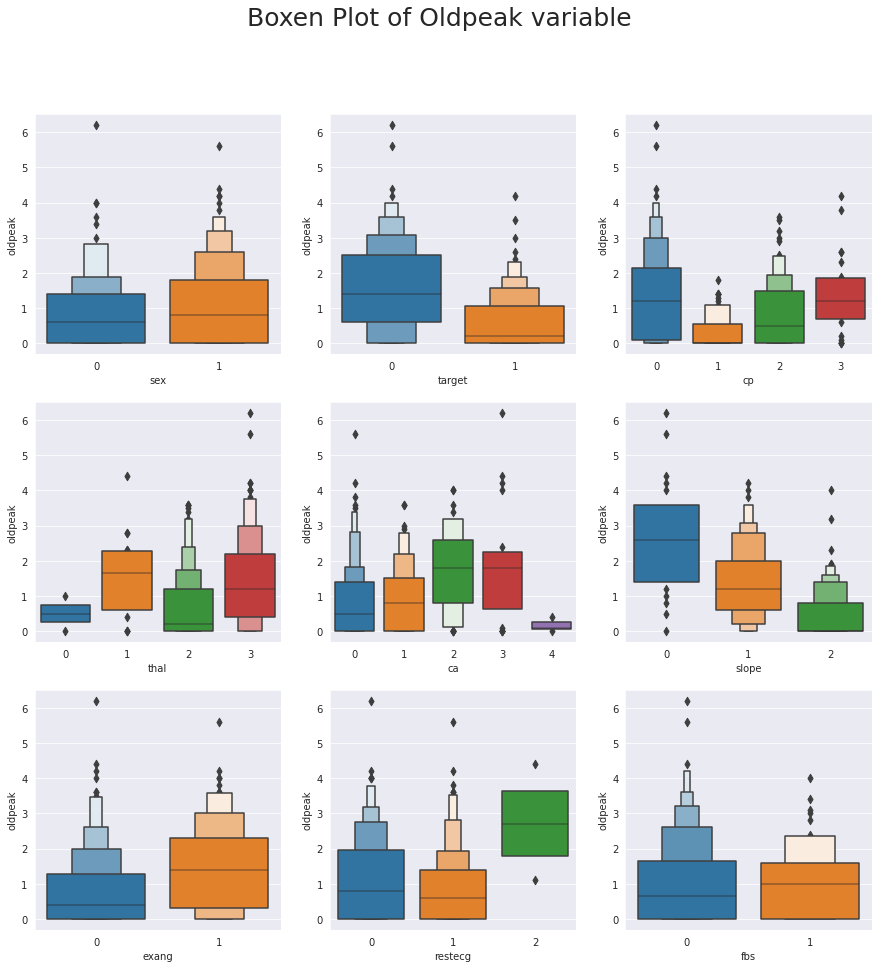

In [23]:
# Boxenplot of Oldpeak variable
fig,axis = plt.subplots(3,3,figsize=(15,15))
sns.boxenplot(x=df1["sex"],y=df1["oldpeak"],ax=axis[0,0])
sns.boxenplot(x=df1["target"],y=df1["oldpeak"],ax=axis[0,1])
sns.boxenplot(x=df1["cp"],y=df1["oldpeak"],ax=axis[0,2])
sns.boxenplot(x=df1["thal"],y=df1["oldpeak"],ax=axis[1,0])
sns.boxenplot(x=df1["ca"],y=df1["oldpeak"],ax=axis[1,1])
sns.boxenplot(x=df1["slope"],y=df1["oldpeak"],ax=axis[1,2])
sns.boxenplot(x=df1["exang"],y=df1["oldpeak"],ax=axis[2,0])
sns.boxenplot(x=df1["restecg"],y=df1["oldpeak"],ax=axis[2,1])
sns.boxenplot(x=df1["fbs"],y=df1["oldpeak"],ax=axis[2,2])
plt.suptitle("Boxen Plot of Oldpeak variable",size=25)

Text(0.5, 0.98, 'Boxen Plot of Thalach variable')

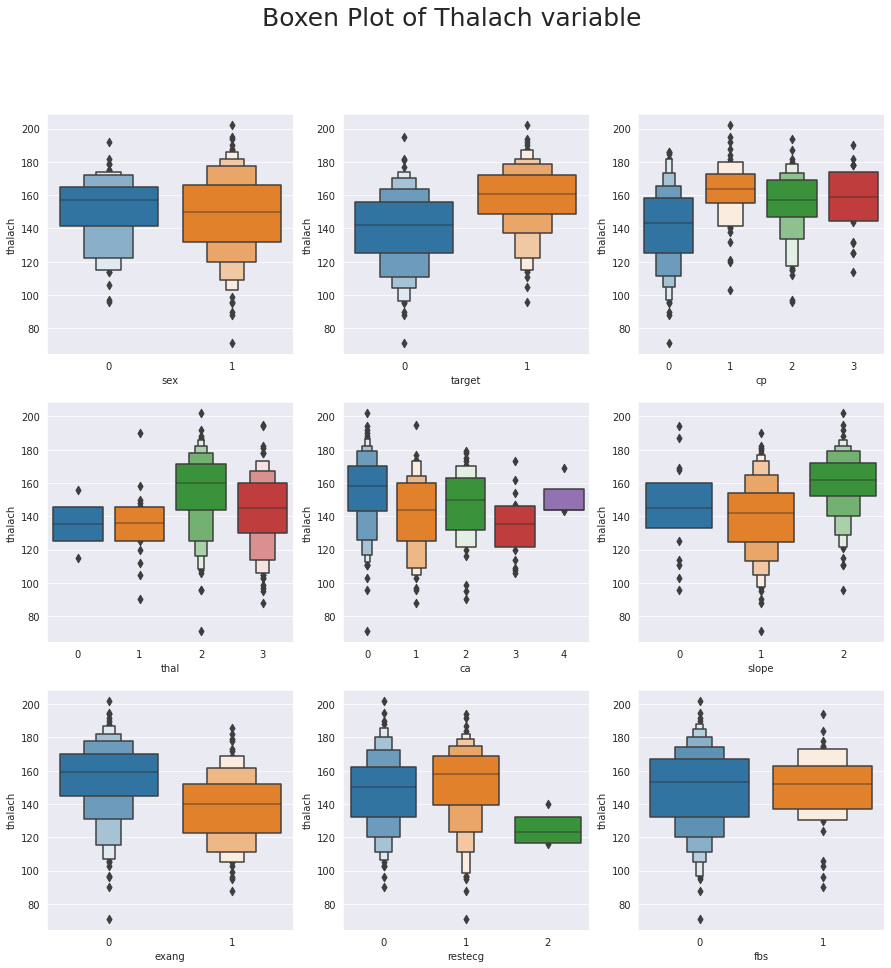

In [24]:
# Boxenplot of Thalach variable
fig,axis = plt.subplots(3,3,figsize=(15,15))
sns.boxenplot(x=df1["sex"],y=df1["thalach"],ax=axis[0,0])
sns.boxenplot(x=df1["target"],y=df1["thalach"],ax=axis[0,1])
sns.boxenplot(x=df1["cp"],y=df1["thalach"],ax=axis[0,2])
sns.boxenplot(x=df1["thal"],y=df1["thalach"],ax=axis[1,0])
sns.boxenplot(x=df1["ca"],y=df1["thalach"],ax=axis[1,1])
sns.boxenplot(x=df1["slope"],y=df1["thalach"],ax=axis[1,2])
sns.boxenplot(x=df1["exang"],y=df1["thalach"],ax=axis[2,0])
sns.boxenplot(x=df1["restecg"],y=df1["thalach"],ax=axis[2,1])
sns.boxenplot(x=df1["fbs"],y=df1["thalach"],ax=axis[2,2])
plt.suptitle("Boxen Plot of Thalach variable",size=25)

Text(0.5, 0.98, 'Boxen Plot of Chol variable')

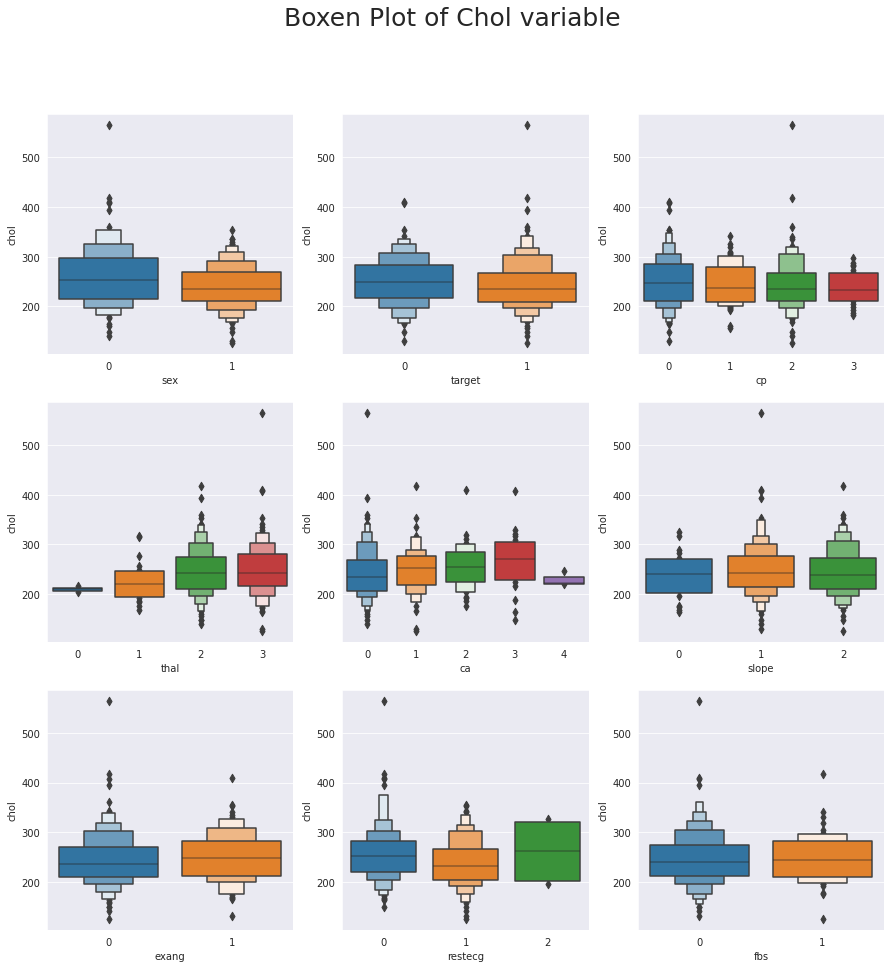

In [25]:
# Boxenplot of Chol variable
fig,axis = plt.subplots(3,3,figsize=(15,15))
sns.boxenplot(x=df1["sex"],y=df1["chol"],ax=axis[0,0])
sns.boxenplot(x=df1["target"],y=df1["chol"],ax=axis[0,1])
sns.boxenplot(x=df1["cp"],y=df1["chol"],ax=axis[0,2])
sns.boxenplot(x=df1["thal"],y=df1["chol"],ax=axis[1,0])
sns.boxenplot(x=df1["ca"],y=df1["chol"],ax=axis[1,1])
sns.boxenplot(x=df1["slope"],y=df1["chol"],ax=axis[1,2])
sns.boxenplot(x=df1["exang"],y=df1["chol"],ax=axis[2,0])
sns.boxenplot(x=df1["restecg"],y=df1["chol"],ax=axis[2,1])
sns.boxenplot(x=df1["fbs"],y=df1["chol"],ax=axis[2,2])
plt.suptitle("Boxen Plot of Chol variable",size=25)

Text(0.5, 0.98, 'Boxen Plot of Trestbps variable')

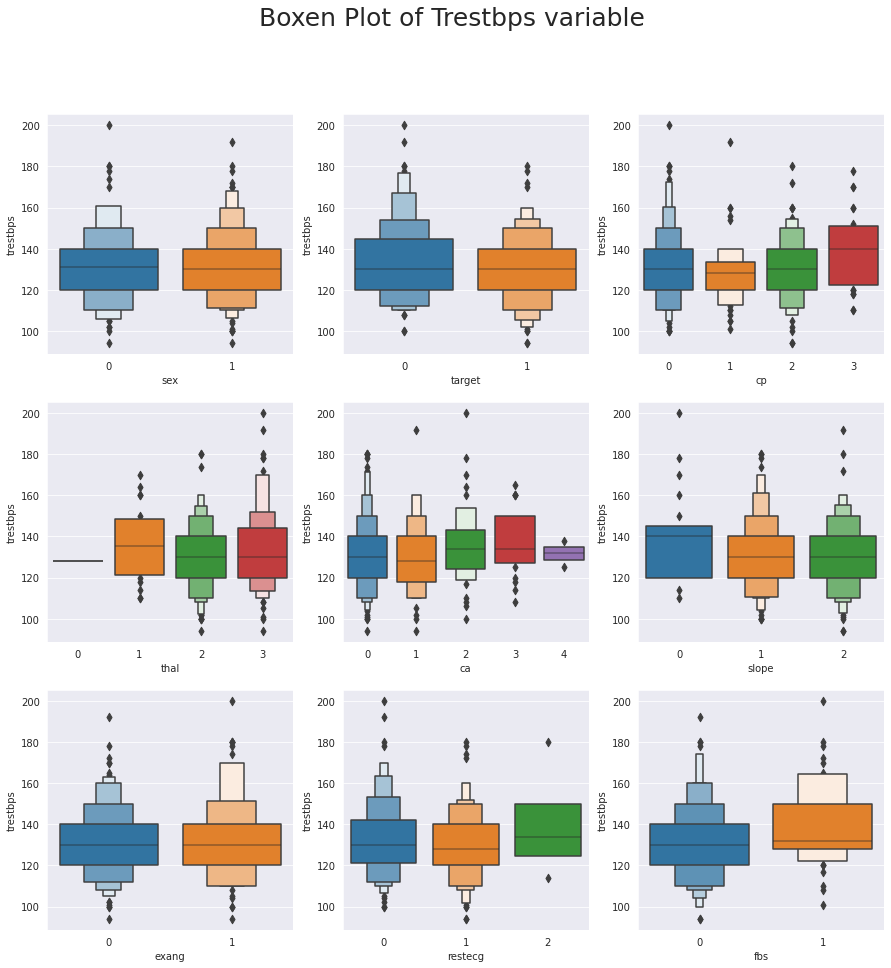

In [26]:
# Boxenplot of Trestbps variable
fig,axis = plt.subplots(3,3,figsize=(15,15))
sns.boxenplot(x=df1["sex"],y=df1["trestbps"],ax=axis[0,0])
sns.boxenplot(x=df1["target"],y=df1["trestbps"],ax=axis[0,1])
sns.boxenplot(x=df1["cp"],y=df1["trestbps"],ax=axis[0,2])
sns.boxenplot(x=df1["thal"],y=df1["trestbps"],ax=axis[1,0])
sns.boxenplot(x=df1["ca"],y=df1["trestbps"],ax=axis[1,1])
sns.boxenplot(x=df1["slope"],y=df1["trestbps"],ax=axis[1,2])
sns.boxenplot(x=df1["exang"],y=df1["trestbps"],ax=axis[2,0])
sns.boxenplot(x=df1["restecg"],y=df1["trestbps"],ax=axis[2,1])
sns.boxenplot(x=df1["fbs"],y=df1["trestbps"],ax=axis[2,2])
plt.suptitle("Boxen Plot of Trestbps variable",size=25)

In [27]:
plot1=pd.DataFrame(df.groupby("sex")["target"].mean().reset_index().values,columns=["Gender","target"])
plot1

,Gender,target
0,0.0,0.750000
1,1.0,0.449275


Text(0.5, 1.0, '0:Female 1:Male')

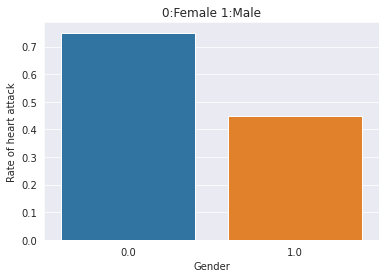

In [28]:
sns.barplot(plot1.Gender,plot1.target)
plt.ylabel("Rate of heart attack")
plt.title("0:Female 1:Male")

### From above plot, we can see that, the rate of heart attack disease in Female is 75% greater than Male.

In [29]:
plot2=pd.DataFrame(df1.groupby("cp")["target"].mean().reset_index().values,columns=["Chest_pain","heart_attack_rate"])
plot2

,Chest_pain,heart_attack_rate
0,0.0,0.272727
1,1.0,0.820000
2,2.0,0.788235
3,3.0,0.695652


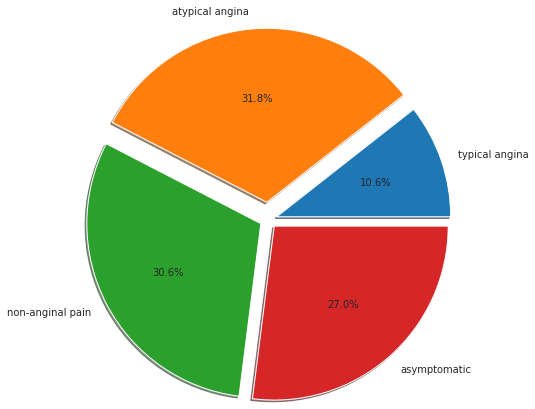

In [30]:
explode=[0.1,0.2,0.1,0.1]
h_label=["typical angina","atypical angina","non-anginal pain","asymptomatic"]
plt.pie(plot2["heart_attack_rate"],labels=h_label,autopct='%1.1f%%',shadow=True,explode=explode, radius=2)
plt.show()

In [31]:
plot3=pd.DataFrame(df1.groupby("exang")["target"].mean().reset_index().values,columns=["Exercise induced angina","heart_attack_rate"])
plot3

,Exercise induced angina,heart_attack_rate
0,0.0,0.693069
1,1.0,0.232323


Text(0.5, 1.0, '0:No 1:Yes')

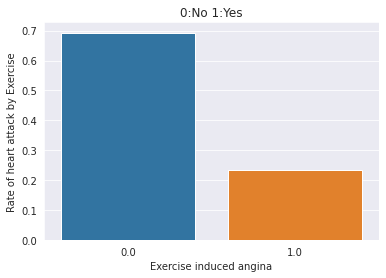

In [33]:
sns.barplot(plot3["Exercise induced angina"],plot3["heart_attack_rate"])
plt.ylabel("Rate of heart attack by Exercise")
plt.title("0:No 1:Yes")

# Preparing Dataset For Model Building

In [34]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [35]:
# Normalization of data
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [36]:
# Split data into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Model Building

# 1) Logistic Regression

In [37]:
# Logistic Regression 
lm=LogisticRegression()
# fit logistic regression
lm.fit(x_train,y_train)
# predict data
lm_y_test_pred=lm.predict(x_test)
# Accuracy of model
lm_acc=accuracy_score(y_test,lm_y_test_pred)
print("Accuracy of Logistic Regression classifier is ",lm_acc)
print('\n')
# Confusion Matrix
print("Confusion Matrix\n",confusion_matrix(y_test,lm_y_test_pred))
print('\n')
# Classificaion Report
print("Classification Report of Logistic Regression :\n",classification_report(y_test,lm_y_test_pred))

Accuracy of Logistic Regression classifier is  0.8131868131868132


Confusion Matrix
 [[32 12]
 [ 5 42]]


Classification Report of Logistic Regression :
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



# 2) Naive Bayes Classifier

In [38]:
# Naive Bayes Classifier
nb=GaussianNB()
#fit Naive bayes classifier
nb.fit(x_train,y_train)
# Prediction
n_y_test_pred=nb.predict(x_test)
# Accuracy of model
nb_acc=accuracy_score(y_test,n_y_test_pred)
print("Accuracy of Naive Bayes classifier is ",nb_acc)
print('\n')
print("Confusion Matrix\n",confusion_matrix(y_test,n_y_test_pred))
print('\n')
print("Classification Report of Naive Bayes classifier :\n",classification_report(y_test,n_y_test_pred))

Accuracy of Naive Bayes classifier is  0.8021978021978022


Confusion Matrix
 [[32 12]
 [ 6 41]]


Classification Report of Naive Bayes classifier :
               precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



# 3) Decision Tree

In [39]:
# Decision Tree
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
#fit decision tree classifier
model.fit(x_train,y_train)
# Prediction
d_y_test_pred=model.predict(x_test)
# Accuracy of model
dt_acc=accuracy_score(y_test,d_y_test_pred)
print("Accuracy of Decision Tree classifier is ",nb_acc)
print('\n')
print("Confusion Matrix\n",confusion_matrix(y_test,d_y_test_pred))
print('\n')
print("Classification Report of Decision Tree classifier :\n",classification_report(y_test,d_y_test_pred))

Accuracy of Decision Tree classifier is  0.8021978021978022


Confusion Matrix
 [[32 12]
 [10 37]]


Classification Report of Decision Tree classifier :
               precision    recall  f1-score   support

           0       0.76      0.73      0.74        44
           1       0.76      0.79      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



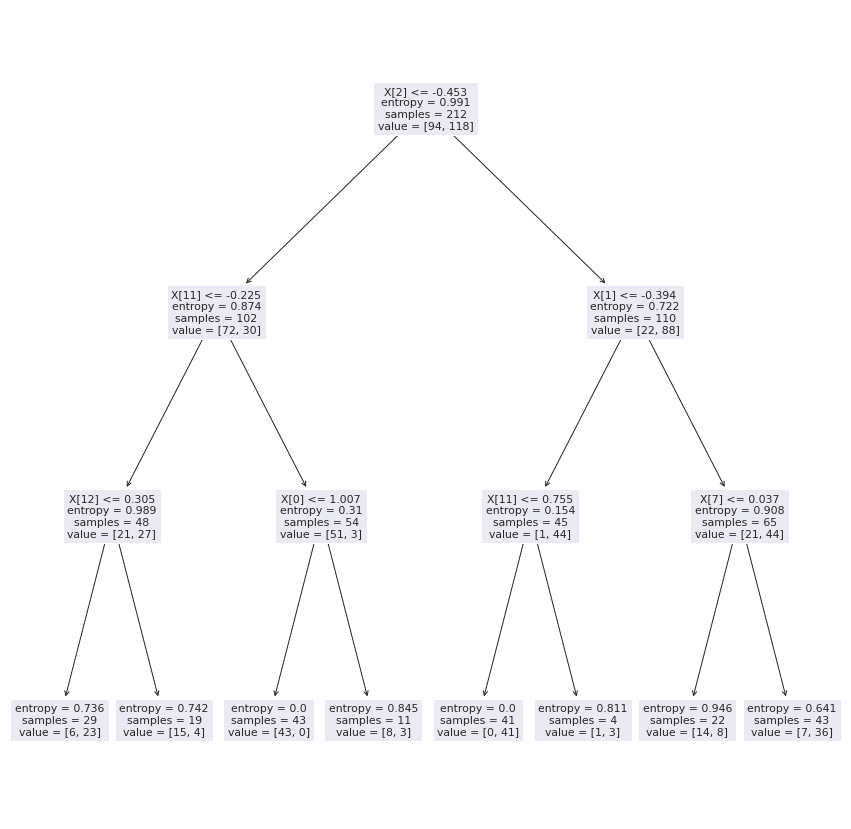

In [40]:
# Decision Tree Plot
plt.figure(figsize=(15,15))
plot_tree(model)
plt.show()

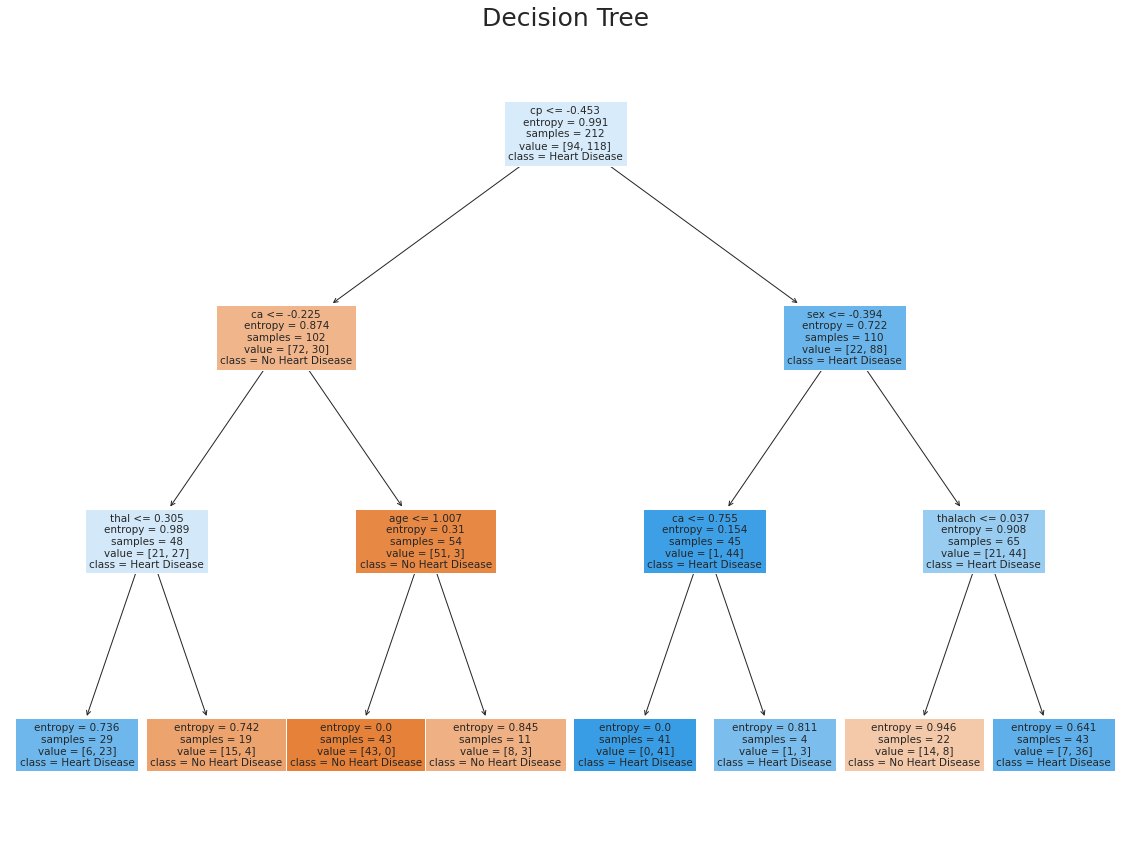

In [41]:
#Modified Decision Tree Plot
fn=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn=["No Heart Disease","Heart Disease"]
plt.figure(figsize=(20,15))
plot_tree(model,feature_names=fn,class_names=cn,filled=True)
plt.title("Decision Tree",size=25)
plt.show()

# 4) K-Nearest Neighbor

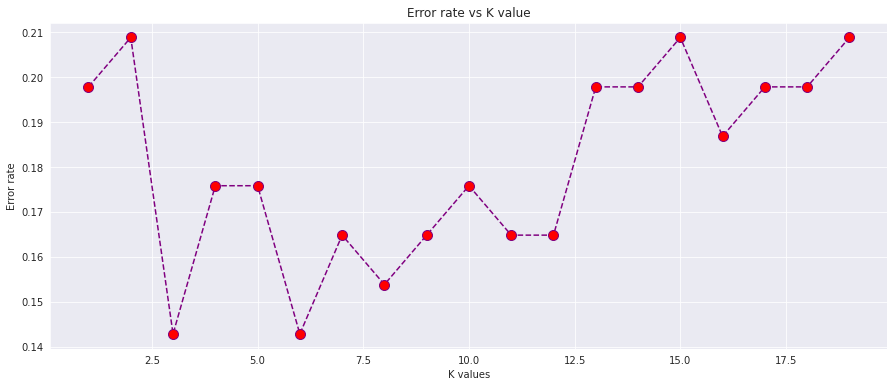

Minimum Value of error rate:- 0.14285714285714285 obtain at K= 2


In [42]:
error_rate=[]
for i in range(1,20):
    model1=KNeighborsClassifier(n_neighbors=i)
    model1.fit(x_train,y_train)
    k_y_test_pred=model1.predict(x_test)
    error_rate.append(np.mean(k_y_test_pred != y_test))
    
    
plt.figure(figsize=(15,6))
plt.plot(range(1,20),error_rate,color='purple',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title("Error rate vs K value")
plt.xlabel("K values")
plt.ylabel("Error rate")
plt.show()

print("Minimum Value of error rate:-",min(error_rate),"obtain at K=",error_rate.index(min(error_rate)))

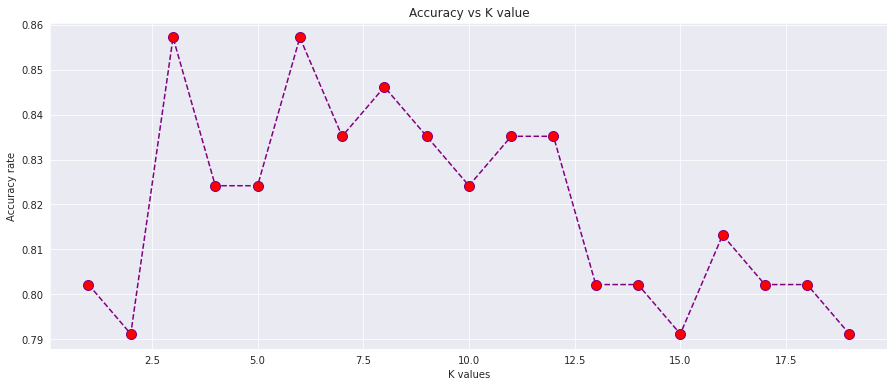

Maximum accuracy:- 0.8571428571428571 obtain at K= 2

 Confusion Matrix:
 [[29  4]
 [15 43]]


In [45]:
acc=[]
for i in range(1,20):
    model1=KNeighborsClassifier(n_neighbors=i)
    model1.fit(x_train,y_train)
    k_y_test_pred=model1.predict(x_test)
    acc.append(accuracy_score(k_y_test_pred,y_test))
    
    
plt.figure(figsize=(15,6))
plt.plot(range(1,20),acc,color='purple',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title("Accuracy vs K value")
plt.xlabel("K values")
plt.ylabel("Accuracy rate")
plt.show()

print("Maximum accuracy:-",max(acc),"obtain at K=",acc.index(max(acc)))
print("\n Confusion Matrix:\n",confusion_matrix(k_y_test_pred,y_test))
kn_acc=max(acc)

# 5) Random Forest

In [47]:
# Random Forest
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0,max_depth=3)
# Fit random forest classifier
rf.fit(x_train,y_train)
# Prediction
rf_y_test_pred=rf.predict(x_test)
# Accuracy of model
rf_acc=accuracy_score(rf_y_test_pred,y_test)
print("Accuracy of Random Forest classifier is ",rf_acc)
print('\n')
print("Confusion Matrix\n",confusion_matrix(rf_y_test_pred,y_test))
print('\n')
print("Classification Report of Random Forest classifier :\n",classification_report(y_test,rf_y_test_pred))

Accuracy of Random Forest classifier is  0.8241758241758241


Confusion Matrix
 [[32  4]
 [12 43]]


Classification Report of Random Forest classifier :
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



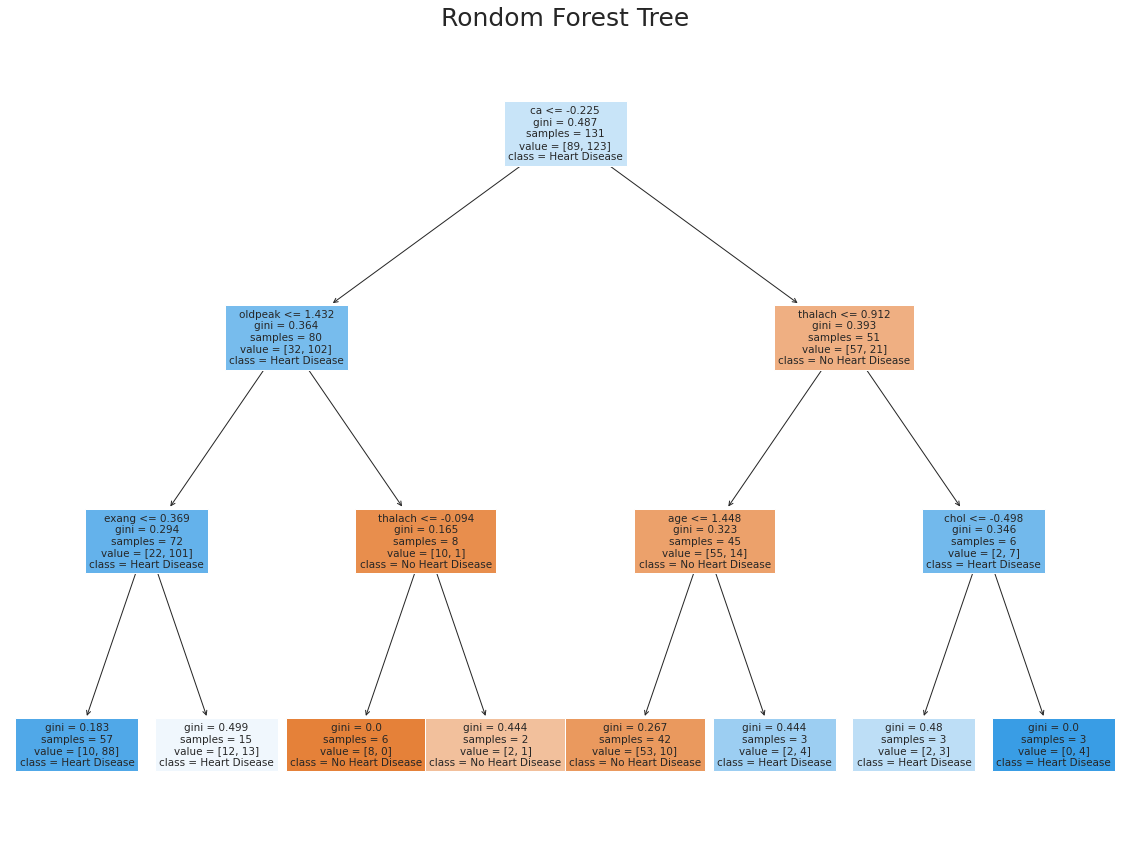

In [48]:
# Random Forest Tree Plot
fn=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
cn=["No Heart Disease","Heart Disease"]
plt.figure(figsize=(20,15))
plot_tree(rf.estimators_[25],feature_names=fn,class_names=cn,filled=True)
plt.title("Rondom Forest Tree",size=25)
plt.show()

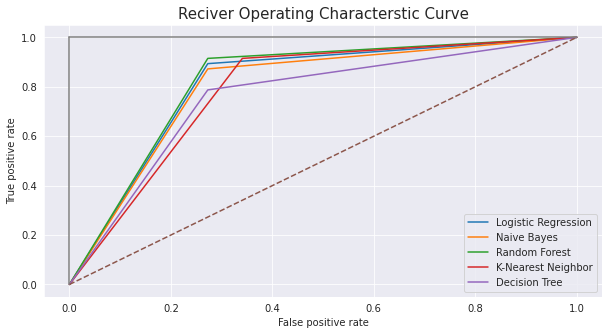

In [49]:
# ROC Curve

lm_false_positive_rate,lm_true_positive_rate,lm_threshold = roc_curve(y_test,lm_y_test_pred)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,n_y_test_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_y_test_pred)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,k_y_test_pred)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,d_y_test_pred)

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve',size=15)
plt.plot(lm_false_positive_rate,lm_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decision Tree')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# Model Evaluation

In [50]:
model_evaluation=pd.DataFrame({"model_name":["Logistic Regression","Naive Bayes","Decision Tree","K-Nearest Neighbor",
                                             "Random Forest"],
                             "Accuracy":[lm_acc*100,nb_acc*100,dt_acc*100,kn_acc*100,rf_acc*100]})
model_evaluation

,model_name,Accuracy
0,Logistic Regression,81.318681
1,Naive Bayes,80.219780
2,Decision Tree,75.824176
3,K-Nearest Neighbor,85.714286
4,Random Forest,82.417582


# Conclusion 

1) K-Nearest Neighbour gives the best Accuracy compared to other models.

2) Rate of heart attack in Female is greater than Male.

3) Chest pain is major reason behind heart attack.

4) Thal is highly correlated with heart attack.

# Thank You